In [52]:
!pip install torchinfo

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
import os
#set workdir
os.chdir("/content/gdrive/My Drive/Projects/MSc-Project-River-Segmentation/MSc-Project/Code")

dataset_dir = os.path.normpath("/content/gdrive/My Drive/Data/sentinel-river-segmentation-dataset/sentinel-river-segmentation-dataset")


In [55]:
! ls


config.cfg     Evaluation.ipynb  __pycache__	 Testing.ipynb
dataloader.py  models		 state_dict.pth  Training.ipynb


In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from dataloader import Dataset
from torchinfo import summary
import time
import copy

from tqdm import tqdm

from models.unet import UNet
from models.simple import Simple

from dataloader import Dataset

In [57]:
PARAMS = {
    "input_size": 416,
    "output_size": 416,
    "model": "vgg_unet",
    "learning_rate": 0.001,
    "n_classes": 2,

    
}

In [58]:
x_train_dir = os.path.join(dataset_dir,"x_train")
y_train_dir = os.path.join(dataset_dir,"y_train")
x_test_dir = os.path.join(dataset_dir,"x_test")
y_test_dir = os.path.join(dataset_dir,"y_test")

In [59]:
train_set = Dataset(x_train_dir, y_train_dir, input_size=PARAMS['input_size'], output_size=PARAMS['output_size'], n_classes=PARAMS["n_classes"])
test_set = Dataset(x_test_dir, y_test_dir, input_size=PARAMS['input_size'], output_size=PARAMS['output_size'], n_classes=PARAMS["n_classes"])

batch_size = 8
dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

In [60]:
# load weights
model.load_state_dict(torch.load("state_dict.pth", map_location="cpu"))

<All keys matched successfully>

In [77]:
from torchvision import transforms
inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

def reverse_transform(inp):
    print(inp.shape)
    inp = inv_normalize(inp)
    inp = inp.numpy()
    inp = np.swapaxes(inp, 1, 3)
    inp = np.swapaxes(inp, 1, 2)
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

def labels2mask(labels):
    return labels[:,1,:,:]

In [80]:
import matplotlib.pyplot as plt
def plot_side_by_side(rgb,ground_truth,predict):
    assert rgb.shape[0] == ground_truth.shape[0] == predict.shape[0]
    batch_size = rgb.shape[0]
    fig, axs = plt.subplots(batch_size, 3, figsize=(30,50))
    for i in range(batch_size):
        print(ground_truth[i].min())
        print(predict[i].min())
        axs[i, 0].imshow(rgb[i])
        axs[i, 1].imshow(ground_truth[i])
        axs[i, 2].imshow(predict[i])

torch.Size([6, 3, 416, 416])
0.0
0.50000006
0.0
0.5000006
0.0
0.5000006
0.0
0.5000005
0.0
0.5000007
0.0
0.50000083


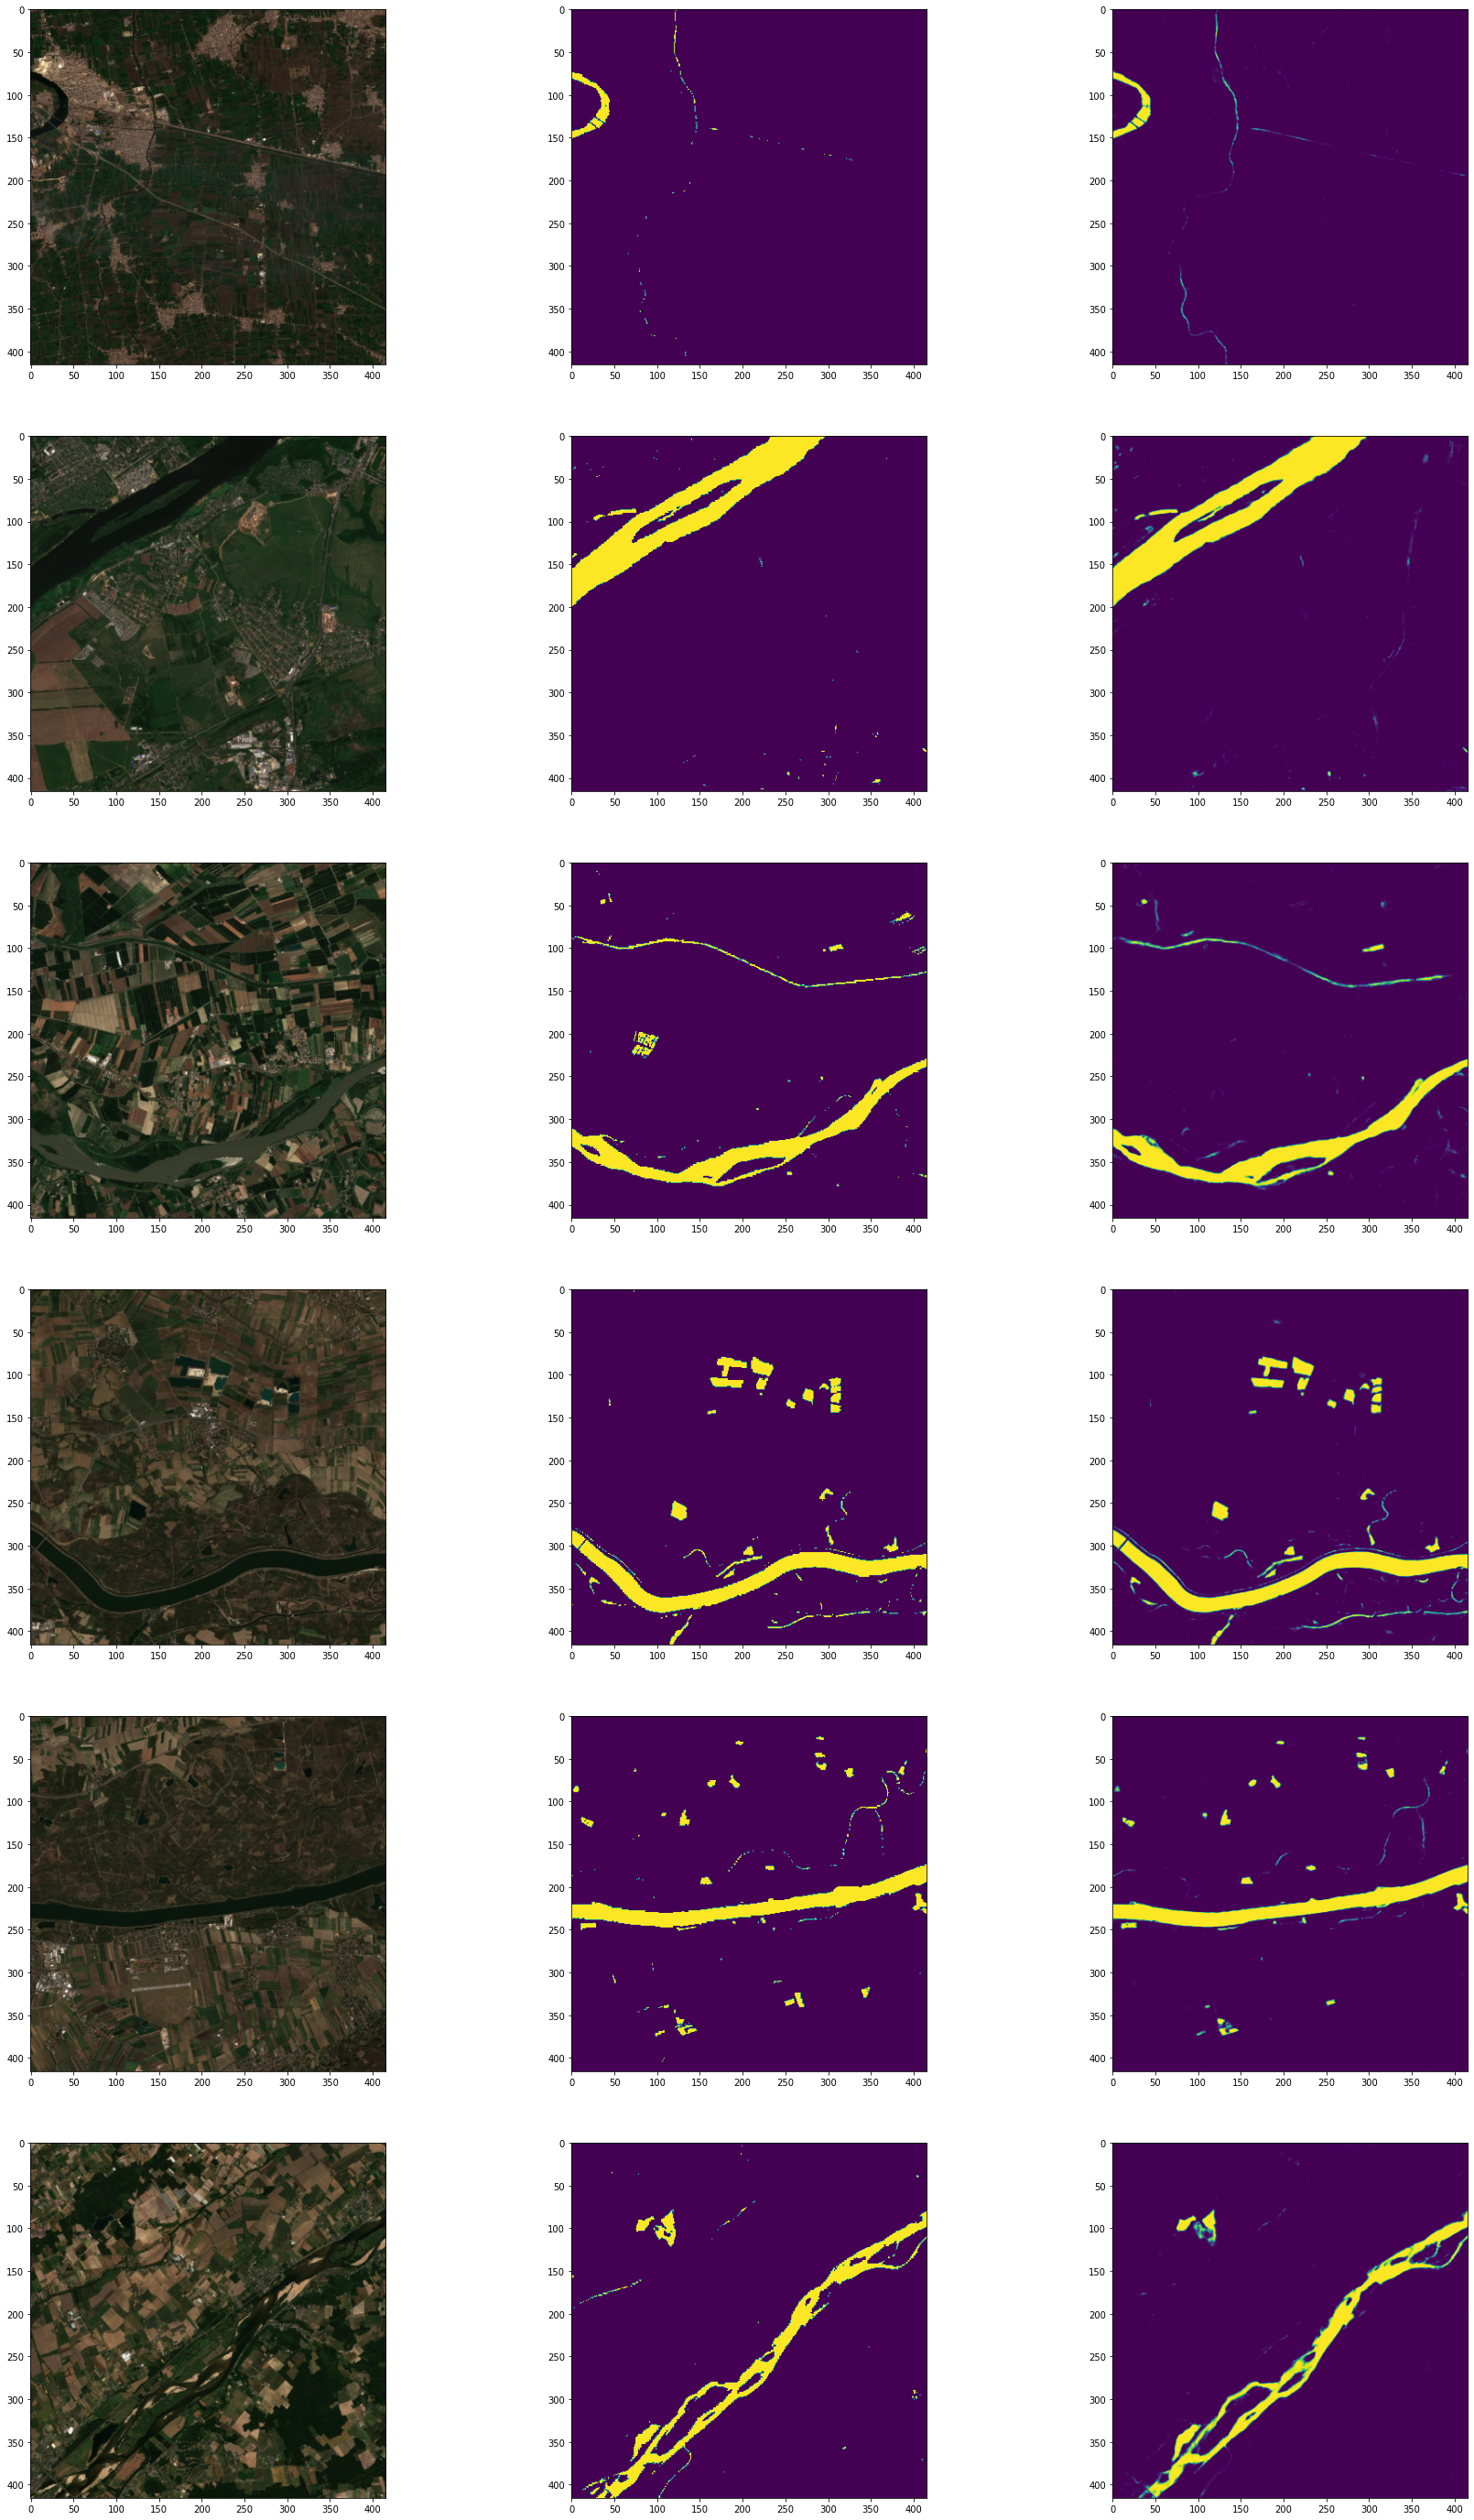

In [82]:
# visualize example segmentation

import math
model.eval()   # Set model to evaluate mode
test_dataset = Dataset(x_test_dir, y_test_dir, input_size=PARAMS['input_size'], output_size=PARAMS['output_size'], n_classes=PARAMS["n_classes"])
test_loader = DataLoader(test_dataset, batch_size=6, shuffle=True, num_workers=0)
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.to(device)

labels = labels.data.cpu().numpy()
pred = model(inputs)
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
inputs = inputs.data.cpu()

#print(inputs.shape)
#print(labels)
#print(torch.sigmoid(torch.from_numpy(pred)).round())

# dataloader return normalized input image, so we have to denormalize before viewing
input_images = reverse_transform(inputs)
# target and predict mask are single channel, so squeeze
target_masks = labels2mask(labels)

pred = labels2mask(pred)

# use helper function to plot
plot_side_by_side(input_images, target_masks, pred)

In [2]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [1]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [11]:
!git commit -m "updated"
!git config --global user.email "moad.s.k@gmail.com"
!git config --global user.name "MoadSaadKhorchef"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@a09332a6f7bf.(none)')


In [12]:
!git push origin main

Everything up-to-date
